# Cours : Traitement des Données Manquantes en Analyse de Données

## Introduction

Les données manquantes sont courantes dans la plupart des ensembles de données réels, et elles peuvent provenir de diverses sources, telles que des erreurs de mesure, des non-réponses dans des enquêtes, ou simplement de l'absence d'information pour certaines observations. Le traitement des données manquantes est une étape cruciale dans l'analyse de données, car des données manquantes mal gérées peuvent entraîner des conclusions erronées et biaiser les résultats. Dans ce cours, nous allons explorer les différentes techniques pour traiter les données manquantes en analyse de données.

## Types de Données Manquantes

Il existe principalement trois types de données manquantes :

1. **MCAR (Missing Completely at Random)** : Les données manquantes sont aléatoires, indépendantes de toute autre variable. La probabilité qu'une donnée soit manquante est la même pour toutes les observations.

2. **MAR (Missing at Random)** : Les données manquantes dépendent d'autres variables observées, mais pas de la variable manquante elle-même. En d'autres termes, la probabilité qu'une donnée soit manquante dépend d'autres informations disponibles.

3. **MNAR (Missing Not at Random)** : Les données manquantes dépendent de la variable manquante elle-même. Ce type de données manquantes est le plus problématique, car il est difficile de supposer que les données manquantes sont aléatoires ou dépendent d'autres variables.

## Techniques de Traitement des Données Manquantes

1. **Suppression des lignes manquantes** : Si vous avez un petit pourcentage de données manquantes et que les données sont MCAR, vous pouvez simplement supprimer les lignes contenant des données manquantes. Cependant, cela peut entraîner une perte d'informations.

2. **Imputation de valeurs manquantes** : Cela consiste à estimer les valeurs manquantes en se basant sur les valeurs observées. Il existe plusieurs méthodes d'imputation, notamment :
   - **Imputation par la moyenne** : Remplacer les données manquantes par la moyenne des valeurs observées.
   - **Imputation par la médiane** : Remplacer les données manquantes par la médiane des valeurs observées.
   - **Imputation par la régression** : Utiliser une régression pour prédire les valeurs manquantes en fonction des autres variables.
   - **Imputation par K-plus proches voisins (K-NN)** : Estimer les valeurs manquantes en se basant sur les valeurs des K-NN les plus proches.

3. **Création de variables indicatrices** : Pour les données manquantes, vous pouvez créer des variables indicatrices (0 pour une valeur manquante, 1 pour une valeur observée) afin de conserver l'information sur le caractère manquant des données.

4. **Modèles d'imputation avancés** : Utiliser des modèles statistiques plus avancés, tels que les modèles EM (Expectation-Maximization) ou les méthodes basées sur les arbres de décision, pour l'imputation des valeurs manquantes.

5. **Validation croisée (cross-validation)** : Si les données manquantes sont MAR, vous pouvez utiliser la validation croisée pour évaluer la performance de différentes méthodes d'imputation et choisir la meilleure.

## Évaluation du Traitement des Données Manquantes

L'évaluation du traitement des données manquantes est essentielle pour garantir la validité des résultats. Voici quelques indicateurs pour évaluer le traitement des données manquantes :

- **Taux de données manquantes** : Calcul du pourcentage de données manquantes dans chaque variable.
- **Comparaison avant/après traitement** : Comparer les statistiques des variables avant et après le traitement des données manquantes pour s'assurer qu'il n'y a pas de biais introduit.
- **Analyse de sensibilité** : Tester différentes méthodes d'imputation et vérifier comment elles affectent les résultats finaux.
- **Validation croisée** : Si possible, utiliser la validation croisée pour évaluer l'impact du traitement des données manquantes sur la performance du modèle.

## Conclusion

Le traitement des données manquantes est une étape critique en analyse de données. Il est essentiel de comprendre les types de données manquantes, de choisir les bonnes techniques d'imputation, et d'évaluer l'impact du traitement des données manquantes sur les résultats de l'analyse. Une gestion appropriée des données manquantes contribue à des conclusions plus fiables et robustes.

N'oubliez pas que la nature des données manquantes doit être prise en compte pour choisir la meilleure stratégie de traitement, et que la transparence quant aux méthodes utilisées est essentielle pour garantir la crédibilité de l'analyse.

In [3]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

from PIL import Image
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Exercice

In [5]:
titanic_0 = sns.load_dataset('titanic')
titanic = titanic_0.copy()

print("  ")
print(titanic.shape)
titanic.tail()

  
(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [6]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Etape 1 : Vérification des types de variables
Pour les variables numériques : int, float
POur les variables textuelles, binaires : category, bool

NB : "Object" contient des types intuitifs quelques

In [8]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [9]:
# Stockage des types numeriques dans une liste
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [10]:
# Projection sur les colonnes dont le type est dans la liste numerics avec la methode
# select_dtypes()

# Resume des variables quantitatives
titanic.select_dtypes(include=numerics).describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Etape 2 : Gestion des doublons
Pourquoi ? Risque de biais sur les statistiques d'imputation

Exemple : fausse moyenne, faux mode

In [11]:
# affichage d'un booleen qui stipule si une ligne est deja apparue telle quelle avant (modifiable dans les options)
titanic.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [12]:
# comptage du nombre de doublons
titanic.duplicated().sum()

107

In [13]:
# Affichage des doublons
titanic[titanic.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
# Suppression des doublons avec la m'ethode "drop_duplicates()"
titanic=titanic.drop_duplicates()

# Affichage du nouveau format 
titanic.shape

(784, 15)

#### Etape 3 : Gestion de la coh'erance des modalites 

In [17]:
# Verification du nombre de modalit'es par variable
# On emploi pour cela la m'ethode interitems() qui permet d'iterer sur (colonne, nom_colonne)

for key, value in titanic.iteritems():
    print("{} {}".format(key, len(titanic[key].unique())))

survived 2
pclass 3
sex 2
age 89
sibsp 7
parch 7
fare 248
embarked 4
class 3
who 3
adult_male 2
deck 8
embark_town 4
alive 2
alone 2


In [18]:
# Verification de la coherence interne des modalites
# Certaines modalites peuvent etre malencontreusement ecrites de differentes facons
# Exemple : "Médecin", "médecin""

cols = titanic.select_dtypes(exclude=numerics).columns
for col in cols:
    print(titanic[col].value_counts)
    print(' ')
    print(' ')
    

<bound method IndexOpsMixin.value_counts of 0        male
1      female
2      female
3      female
4        male
        ...  
885    female
887    female
888    female
889      male
890      male
Name: sex, Length: 784, dtype: object>
 
 
<bound method IndexOpsMixin.value_counts of 0      S
1      C
2      S
3      S
4      S
      ..
885    Q
887    S
888    S
889    C
890    Q
Name: embarked, Length: 784, dtype: object>
 
 
<bound method IndexOpsMixin.value_counts of 0      Third
1      First
2      Third
3      First
4      Third
       ...  
885    Third
887    First
888    Third
889    First
890    Third
Name: class, Length: 784, dtype: category
Categories (3, object): ['First', 'Second', 'Third']>
 
 
<bound method IndexOpsMixin.value_counts of 0        man
1      woman
2      woman
3      woman
4        man
       ...  
885    woman
887    woman
888    woman
889      man
890      man
Name: who, Length: 784, dtype: object>
 
 
<bound method IndexOpsMixin.value_counts of 0      

#### Etape 4 : Gestion des valeurs manquantes

In [19]:
# Nombre de valeurs "non disponibles" par variable

titanic.isnull().sum() #titanic.isna().sum()


survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

In [21]:
# Pourcentage des valeurs manquantes par variable
prct_manquants = titanic.isna().sum() * 100 / titanic.shape[0]
round(prct_manquants.sort_values(), 2)

survived        0.00
pclass          0.00
sex             0.00
sibsp           0.00
parch           0.00
fare            0.00
class           0.00
who             0.00
adult_male      0.00
alive           0.00
alone           0.00
embarked        0.26
embark_town     0.26
age            13.52
deck           74.23
dtype: float64

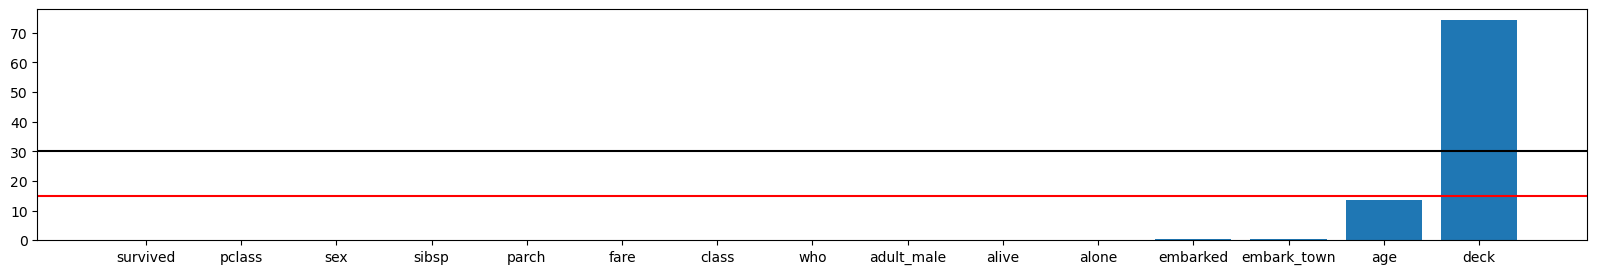

In [23]:
# Visualisation du pourcentage de manquants par variable

fig = plt.figure(figsize=(20,3))
plt.bar(x=prct_manquants.sort_values().index, height=prct_manquants.sort_values().values)
plt.axhline(y=15, color ='r', linestyle = '-' ) # ligne à 15%
plt.axhline(y=30, color ='k', linestyle = '-' ) # ligne à 30%

#### Etape 5 : Détection du tupe de donnée manquant
#### Démarche
construire une matrice qui indique pour une donnée si elle est manquante ou pas 

MCAR Evaluer les laisons entre les variables à problèmes et les autres

MAR Evaluer si les modalités de certaines variables sont liées a des variables problématiques

MNAR Si non (MCAR OU MAR) Evaluer le lien entre le manquant et la valeur qui auraint dû être.

##### Cas de MCAR

In [24]:
to_change = list(prct_manquants[prct_manquants>0].index)
to_change

['age', 'embarked', 'deck', 'embark_town']

In [25]:
# Tableau des indicatrices (manquants ou non)

bool_titanic = 1*titanic[to_change].isnull()
bool_titanic.tail()

,age,embarked,deck,embark_town
885,0,0,1,0
887,0,0,0,0
888,1,0,1,0
889,0,0,0,0
890,0,0,1,0


In [ ]:
from scipy.stats import chi2_contingency

def cramers_v(var1, var2):
    """
    Evalue par une normalisation du chi-deux entre 0 et 100% 
    la correlation entre deux variables categorielles
    """
    #Tableau de contegence
    crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))
    stat = chi2_contingency(crosstab) #[0] valeur de la statistique du test
    obs = np.sum(crosstab) # Nombre d'observations
    mini = min(crosstab.shape) - 1
    return ((np.sqrt(stat[0]/(obs*mini))), stat[1]*100)


In [ ]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame()

for i in bool_titanic.columns :
    data_encoded[i] = label.fit_transform(bool_titanic[i])

In [ ]:
rows = []

for var in data_encoded:
    col = []
    cramers_v = cramers_v(data_encoded[var], data_encoded.age)[0]
    col.append(p)
    rows.append(col)
c_r1=np.array(rows)
df_1 = pd.DataFrame(c_r1, columns=['Association avec age (%)'], index=data_encoded.columns)

rows_2 = []
for var in data_encoded:
    col2 = []
    p =cramers_v(data_encoded[var], data_encoded.age)[1]
    col2.append(p)
    rows_2.append(col2)
    
c_r2=np.arrange(rows_2)
df_2 = pd.DataFrame(c_r2, columns = ['p-value (%)'], index=data_encoded.columns)

df_v=pd.concat([df_1, df_2], axis=1)


In [ ]:
df_v.sort_values(by='Association avec age (%)')